<a href="https://colab.research.google.com/github/phervind/telkomsel-training-github/blob/main/Module_3_3_Data_Processing_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3.3 - Data Processing with Pandas

# Download Data

Kita akan mendownload file ini:

https://drive.google.com/file/d/1GOrtyXw1hU06fwYgWofK1_TEQYFy-QY4/view

Untuk mendownload data dari Google Drive, kita akan menggunakan library `gdown` (lihat https://github.com/wkentaro/gdown)

In [ ]:
import gdown

In [ ]:
gdrive_url = "https://drive.google.com/file/d/1GOrtyXw1hU06fwYgWofK1_TEQYFy-QY4/view"
file_name = 'loan_data.csv'

gdown.download(gdrive_url, file_name, fuzzy=True)

Go to Files on the left hand side and check whether `loan_data.csv` is available

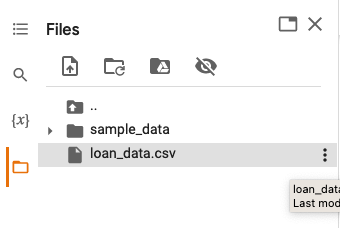


# Section 1: Pandas Intro

- Singkatan dari Python Data Analysis Library
- Library yang paling sering digunakan untuk data analysis, built on top of numpy
- Library import convention: **import pandas as pd**

In [ ]:
import pandas as pd

## Importing files

Pandas can read data from many files. Let's explore importing data from:
- **CSV file** (that we just downloaded with gdown)
- **Google Sheet** (https://docs.google.com/spreadsheets/d/15UfozyRkB_Z3iDemMdz6GKeusKPKKOEhG2kKAe2txIg/edit#gid=656783913)

Go to Files on the left hand side and check whether `loan_data.csv` is available

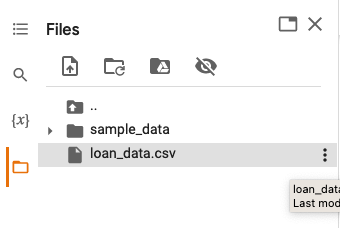

And copy the path to the file

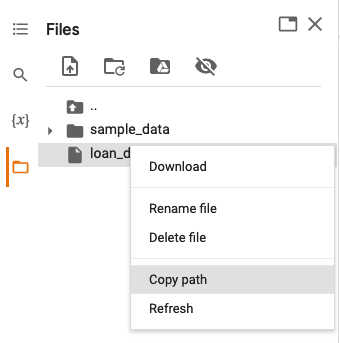

In [ ]:
# To import data from CSV file, we can use `pd.read_csv('filename.csv')` function
# Let's import it and store it as "df" variable
df = pd.read_csv('/content/loan_data.csv')
df

In [ ]:
# Let's import the same data, but from Google Sheet
# However, Pandas has no direct function to access Google Sheet data, so we need a workaround
# make sure the Google Sheet has view access to all user in the internet

GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1_PyKgoqIKac0PPZPCSStFGuaN8CVQhdqOZDUcP5FjcM/edit#gid=656783913'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(GSHEET_URL_CSV)
df

## Know more about your data

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.info()

In addition to technical knowledge, it's always good to know business background of your data.

## Viewing & Filtering Your Data
Sometimes you want to work with only some parts of your data.
There are two methods to do that: square-bracket method [] and .loc() method

### Viewing the data

In [ ]:
# Single column as an array
# Single bracket here! []
df['id']

In [ ]:
# Single column as Pandas DataFrame
# Double bracket here! [[]]
df[['id']]

In [ ]:
# Multiple columns
df[['id','loan_amnt']]

In [ ]:
# Access some rows/index only
df[0:3]

In [ ]:
# Access some rows & columns only
# Here we use .loc() --> "locate"
df.loc[0:3 , ['id','grade']]

In [ ]:
# Access some columns only
# Here we use .loc() --> "locate"
df.loc[: , ['id','grade']]
# : arti nya ambil semua baris yang ada

In [ ]:
df.loc[0:7 , :]

### Filtering the data by condition



In [ ]:
df['grade'] == 'A'

In [ ]:
# Put condition inside a square bracket
df[df['grade'] == 'A']

In [ ]:
# Put condition inside a square bracket
df.loc[df['grade'] == 'A']

In [ ]:
# Alternatively, .loc() also works
df.loc[(df['loan_amnt'] > 20000)]

In [ ]:
# Alternatively, .loc() also works
df.loc[(df['loan_amnt'] > 20000)  ,   ['id','loan_amnt']]

### Multiple conditions

If you have multiple conditions, you can use
- `&` to have AND
- `|` to have OR

In [ ]:
# Example: loan with grade A or B and loan amount < 5000
# Notice that each conditions


df[
    (df['grade'].isin(['A','B']))
    &
     (df['loan_amnt'] < 10000)
     ]

In [ ]:
# Loan with grade A OR loan_amnt > 20000
df[(df['grade'] == 'A')
   |
    (df['loan_amnt'] > 20000)
]

### Exclude some data by condition

You can use tilde (~) to exclude some data with condition

In [ ]:
# Exclude loan data from grade A
df[~(df['grade'] == 'A')]

In [ ]:
# Exclude if loan is A or if loan amount > 20000
df[~((df['grade'] == 'A') | (df['loan_amnt'] > 20000))]

## Copy Your Dataset

do not use
```python
df2 = df
```

but use
```python
df2 = df.copy()
```

If you want to copy existing DataFrame to new variable, you need to explicitly use .copy()

This is to ensure that any changes to new copy will **only** apply to the copy, not to original df

In [ ]:
df2 = df.copy()
df2

## Manipulating Your Data

### Renaming columns

To rename the columns, we can use .rename() function

In [ ]:
# For example, let's rename "grade" as "risk_grade"
# In the business, a loan's risk grade measures likelihood of customer to pay the loan.
# Typically "A" for best likelihood, "F" for very risky.

df2.columns

In [ ]:
df2.head()

In [ ]:
df2 = df2.rename(columns = {'grade':'risk_grade'})

df2.columns

In [ ]:
df2.head()

### Renaming Rows
To rename the rows, we typically set new index using .set_index() function

In [ ]:
# For example, let's set "id" as index of df2
df2 = df2.set_index("id")
df2.head()

notice the different of the data,
now we can filter the row by `id` directly

In [ ]:
df2.loc[68466926]

In [ ]:
df2.loc[[68466926, 68476715]]

In [ ]:
df2.loc[[68466926, 68476715], ['loan_amnt', 'int_rate']]

### Adding new columns
Columns operation can be done similar to variable

In [ ]:
df2['decimal_int_rate'] = df2['int_rate']/100

In [ ]:
df2.head()

In [ ]:
# Change interest_rate to decimal
df2['decimal_int_rate'] = df2['int_rate']/100

# Combining risk_grade and sub-grade
df2['merged_grade'] = df2['risk_grade'] + ',' + df2['sub_grade']

In [ ]:
df2.head()

We can also use .loc() to create new column.

For example: Create a column `loan_amnt_type` with rules:
- "High Amount" if loan_amnt >= 20000
- "Low Amount" if loan_amnt < 20000

In [ ]:
df2.loc[(df2['loan_amnt'] >= 20000), 'loan_amnt_type'] = 'High Amount'
df2.loc[(df2['loan_amnt'] < 20000), 'loan_amnt_type'] = 'Low Amount'

### Editing the data

Let's suppose the client with id = 68466926 (top row) is now have their own home, so their home_ownership status changed to OWN.

We can edit the data using .loc()

In [ ]:
df2.loc[68466926, 'home_ownership']

In [ ]:
df2.loc[68466926, 'home_ownership'] = 'OWN'
df2

### Latihan 1
####  Filtering dan edit data

Steps:
1. Copy dulu `df2` ke dalam variabel bernama `df_a` untuk latihan ini
2. filter `df_a` dengan baris yang `annual income` nya lebih kecil dari 5 kali `loan amount` (hint: jumlah baris 58 setelah filter)
3. Di kolom `verification_status` ada 3 value `Not Verified`, `Source Verified` & `Verified`. karena kurang efektif, **buatlah kolom baru** `verification_status_group` yang menggabungkan `Source Verified` & `Verified` menjadi `Verified` , `Not Verified` tetap `Not Verified`
4. show `df_a` dengan dua kolom saja `verification_status` dan `verification_status_group` untuk pengecekan yang di nomor 3

In [ ]:
# Step 1
df_a = df2.copy()

In [ ]:
# Step 2
df_a = df_a.loc[df_a['annual_inc'] < df_a['loan_amnt'] * 5 ]

df_a

In [ ]:
# Step 3
df_a.loc[
    df_a['verification_status'].isin(['Source Verified', 'Verified'])
    ,
    'verification_status_group'] = 'Verified'

df_a.loc[df_a['verification_status'].isin(['Not Verified']) , 'verification_status_group'] = 'Not Verified'


In [ ]:
# Step 4
df_a[['verification_status','verification_status_group']]

## Basic Descriptives
Let's check the basic statistics of `loan_amnt`

In [ ]:
# In business we call this "size of loan book"
df2['loan_amnt'].count()

In [ ]:
# In business we call this "volume of loan book"
df2['loan_amnt'].sum()

In [ ]:
# In business we call this "average ticket size"
df2['loan_amnt'].mean()

In [ ]:
# Distinct values of the loan
df2['loan_amnt'].nunique()

In [ ]:
# Max values of the loan
df2['loan_amnt'].max()

In [ ]:
# Min values of the loan
df2['loan_amnt'].min()

### Latihan 2
#### Explorasi risk grade C

Dalam dataset `df2` ini terdapat 6 risk_grade: A, B, C, D, E, dan F.
untuk latihan ini kita akan mencari summary dari risk grade C

Steps:
1. Buat copy dataframe tersendiri untuk risk grade C, lalu tentukan:
2. Hitung Size of loan book
3. Hitung Volume of loan book
4. Hitung Average ticket size dari loan
5. Average interest rate (volume-weighted : [method](https://www.savingforcollege.com/article/how-to-calculate-the-weighted-average-interest-rate))

In [ ]:
# Step 1
df_C = df2[df2['risk_grade'] == 'C']
# df_C

In [ ]:
# Step 2
print('Size of loan book:', df_C['loan_amnt'].count()  )


In [ ]:
# Step 3
print('Volume of loan book:',df_C['loan_amnt'].sum())


In [ ]:
# Step 4
print('Average ticket size:',df_C['loan_amnt'].mean())


In [ ]:
'Average ticket size:',df_C['loan_amnt'].mean()

In [ ]:
# Step 5
(df_C['int_rate']*df_C['loan_amnt']).sum() / df_C['loan_amnt'].sum()

In [ ]:
print("aa")

In [ ]:
"bb"
"aa"

In [ ]:
print("bb")
print("aa")

# Section 2: Cleaning Data


Pada Section ini kita akan melakukan:
- Fix typo / Misinformation
- Remove Duplicate
- Handle Missing Values
- Format Date time information



## Download Data

In [ ]:
dict_data_url = {"bank_accounts.csv" : "https://drive.google.com/file/d/1MWA1LPOsNkXTp2jw5Zh1-L_LCgIrEZl5/view?usp=drive_link",
                 "cards.csv" : "https://drive.google.com/file/d/1iFHINiK-3fs5oxIcXdj-nD36kNn4kzJA/view?usp=drive_link",
                 "transactions.csv" : "https://drive.google.com/file/d/10xX8mhUR_v_NDh083-U555sSEZAqBgub/view?usp=drive_link"
}

In [ ]:
for file_name, gdrive_url in dict_data_url.items():
  gdown.download(gdrive_url, file_name, fuzzy=True)

## Load Data

In [ ]:
df_acc = pd.read_csv("/content/bank_accounts.csv")
df_card = pd.read_csv("/content/cards.csv")
df_trx = pd.read_csv("/content/transactions.csv")


terdapat alert untuk data `transaction` cuma mau kasi potential mixed type, jadi di sarankan buat import nya pakai `low_memory=False` jadi tetap hasil konsisten tapi konsekuensi nya makan memory lebih banyak aja (untuk case ini ga masalah, karna datanya masih kecil ~70mb)

In [ ]:
df_trx = pd.read_csv("/content/transactions.csv", low_memory=False)


setelah load datan kita cek dulu `head` or `tail` nya buat liat bentuk data nya

In [ ]:
df_acc.head()


In [ ]:
df_card.head()

In [ ]:
df_trx.head()

Gambar relationional 3 tabel ini
![relational](https://i.imgur.com/jcyYvfO.png)

Schema ketiga dataframe di atas adalah

![bank account](https://i.imgur.com/5p0YS6C.png)
![card](https://i.imgur.com/CwhG7tq.png)
![transaction](https://i.imgur.com/l4dpCUy.png)


## Data Cleaning and Preparation: Step by Step

Langkah-langkah yang akan dilakukan adalah:
1. Pengecekan data
 - first few rows `df.head()`
 - overview -> `df.info()`
 - unique value -> `df.nunique()`
 - Typo -> `df[col].value_counts()`
 - Duplicates ->  `df[df.duplicated()]`
 - Missing values ->  `df[df.isnull().any(axis='columns')]`
2. Mengubah format time series
3. Mengisi/menghapus data yang hilang (missing value)
4. Memperbaiki typo dengan replace string
5. Menghilangkan data yang duplikat
6. Memperbaiki type kolom dataset

## Cleaning Dataframe Bank Account

### 1. Data Checking

In [ ]:
df_acc.head()

In [ ]:
df_acc.info()

In [ ]:
df_acc.nunique()

Dari `df_acc.head()` `df_acc.info()` dan `df_acc.nunique()` yang bisa di dapatkan adalah

1. Terdapat null value di kolom `client_district_id`
2. `birth_date` format nya `YYYYMMDD`
3. `acct_opening_dt` format nya `YYMMDD`
4. `account_id` nilai nya unik untuk setiap baris (expected)
5. `client_id` nilai nya unik untuk setiap baris (kebetulan karena di perbolehkan aja 1 client punya banyak account)
6. Hanya `statement_frequency` yang perlu di cek apakah ada typo atau tidak

In [ ]:
df_acc['statement_frequency'].value_counts()

in case kalau punya banyak kolom yang mau di cek typo nya, bisa ambil aja kolom yang tipe nya `object` (`object` = `string`)



In [ ]:
df_acc.select_dtypes('object').columns

In [ ]:
for col_name in df_acc.select_dtypes('object').columns:
  print(col_name)
  print(df_acc[col_name].value_counts())
  print("~~~~~")

In [ ]:
# cek duplicate
df_acc.duplicated()

In [ ]:
df_acc[df_acc.duplicated()]

In [ ]:
 # Lihat di sepanjang kolom (axis='column') apakah ada nilai yang null; jika ada, keluarkan baris2 tersebut.
df_acc[ df_acc.isnull().any(axis='columns') ]



In [ ]:
df_acc[ df_acc['client_district_id'].isnull() ]


Dari pengecekan yang dilakukan di atas didapatkan:  

1. Terdapat null value di kolom `client_district_id`
2. `birth_date` format nya `YYYYMMDD`
3. `acct_opening_dt` format nya `YYMMDD`
4. `account_id` nilai nya unik untuk setiap baris (expected)
5. `client_id` nilai nya unik untuk setiap baris (kebetulan karena di perbolehkan aja 1 client punya banyak account)
6. Hanya `statement_frequency` yang perlu di cek apakah ada typo atau tidak
7. Tidak ada typo
8. Tidak terdapat data duplicate

Kemudian kita akan mengubah isi dari dataframe.

Sebelum itu, kita simpan dulu **original** dataframe nya just in case ada yang salah di process, bisa kita rollback tanpa read ulang nya dari source

In [ ]:
df_acc_org = df_acc.copy()

### 2. Mengubah format time series

In [ ]:
df_acc['birth_date']

In [ ]:
pd.to_datetime(df_acc['birth_date'])

by default, `pd.to_datetime` ga bisa mendeteksi format data yang ada.


function itu mengira `19560111` bagian dari `milisecond`


kita perlu explisitkan format nya `YYYYMMDD`

bisa cek dokumentasi disini
* https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

dan simulasi format di sini
* https://www.strfti.me/

In [ ]:
pd.to_datetime(df_acc['birth_date'], format = '%Y%m%d')

In [ ]:
df_acc['birth_date'] = pd.to_datetime(df_acc['birth_date'], format = '%Y%m%d')

In [ ]:
df_acc.head()

### Latihan 3

coba benarkan format kolom `acct_opening_df`

Step, cari format yang tepat untuk fungsi `pd.to_datetime`, bisa look up ke link di subsection di atas

hasil akhir dari latihan ini adalah replace kolom `acct_opening_df`

```python
df_acc['acct_opening_dt'] =  ...
```

In [ ]:
# coba di cell ini sebelum replace column acct_opening_dt
pd.to_datetime(df_acc['birth_date'], format = '%Y%m%d')

In [ ]:
# replace column acct_opening_dt


### Handle Missing Data

Tadi missing data nya ada di kolom `client_district_id` saja.

Terdapat `1139` baris yang null dari `4500` relative banyak `(~25%)` jika kita mau membuang semua baris yang memiliki null value di `client_district_id`.

Sebenar nya bisa kita proxy dengan menggunakan value dari `acct_district_id`, jadi untuk informasi district client yang tidak di ketahui, kita anggap saja sama dengan district dia membuat account  

In [ ]:
df_acc[df_acc.isnull().any(axis='columns')]

In [ ]:
df_acc['client_district_id'] = df_acc['client_district_id'].fillna(df_acc['acct_district_id'])


In [ ]:
df_acc.head()

### Memperbaiki type kolom dataset

In [ ]:
df_acc.info()

untuk tipe data yang keliru hanya `client_district_id` yang seharus nya hanya perlu `int64` tidak perlu `float64`.

hal ini terjadi karena `pandas` akan mengassign data type yang numerical menjadi `float64` jika terdapat missing value di kolom tersebut

In [ ]:
df_acc['client_district_id'] = df_acc['client_district_id'].astype(int)

In [ ]:
df_acc.info()

## Cleaning Dataframe Cards

### Data Checking

In [ ]:
df_card.head()

In [ ]:
df_card.info()

In [ ]:
df_card.nunique()

In [ ]:
df_card['card_type'].value_counts()

In [ ]:
df_card[df_card.duplicated()]

In [ ]:
df_card[df_card.duplicated(keep = False)]

In [ ]:
df_card[df_card['client_id'].duplicated(keep = False)]

Dari pengecekan yang dilakukan di atas didapatkan:  

1. Terdapat null value di kolom `issued`
2. `client_id` tidak unik, karena terdapat 892 unique value di tabel dengan 902 baris
3. `issued` adalah date dengan format `YYYY-MM-DD`
4. Terdapat duplicate di tabel ini
5. Terdapat null value di kolom `issued`


Kemudian kita akan mengubah isi dari dataframe.

Sebelum itu, kita simpan dulu original dataframe nya just in case ada yang salah di process, bisa kita rollback tanpa read ulang nya dari source

In [ ]:
df_card_org = df_card.copy()

### Mengubah format time series


In [ ]:
pd.to_datetime(df_card['issued'], format = '%Y-%m-%d')

In [ ]:
df_card['issued'] = pd.to_datetime(df_card['issued'], format = '%Y-%m-%d')

In [ ]:
df_card.head()

### Handle Missing Data

kebetulan di 2 row yang missing data itu di `client_id` 1629 dan 2226 yang punya muncul dua kali di tabel ini

kita bisa `impute` tanggal yang missing dengan value dari `client_id` tersebut di baris yang lain

In [ ]:
df_card[df_card['client_id'].duplicated(keep = False)]

keliatan nya kita perlu mengambil informasi di baris sebelum nya

ini refrensi data imputation di pandas
* https://pandas.pydata.org/docs/user_guide/missing_data.html#filling-missing-values-fillna

kita cek dulu antara `bfill` dan `ffill`

In [ ]:
df_card[df_card['client_id'].duplicated(keep = False)].bfill()

In [ ]:
df_card[df_card['client_id'].duplicated(keep = False)].ffill()

for our case, it is good to use `ffill`

In [ ]:
df_card = df_card.ffill()

kita cek lagi kedua `clien_id` di atas

In [ ]:
df_card[df_card['client_id'].isin([1629,2226])]

### Remove Duplicate

In [ ]:
df_card[df_card.duplicated()]

In [ ]:
df_card = df_card.drop_duplicates()

In [ ]:
df_card

In [ ]:
df_card[df_card.duplicated()]

In [ ]:
df_card.info()

![question](https://miro.medium.com/v2/resize:fit:1000/0*LKYyNI--2468k8BT.jpg)

## Cleaning Dataframe Transaction

In [ ]:
df_trx.head()

In [ ]:
df_trx.info()

In [ ]:
df_trx.nunique()

### Latihan 4 [Breakout Room]

1. Lanjutkan pengecekan data (Typo, Duplicates, Missing values) kemudian tulis hasil pengcekan nya sebagai note / markdown di notebook ini
2. Mengubah format time series (if needed)
3. Handle missing data (if any)
4. Remove duplicate (if needed)
5. Fixing typo (if any)
6. Grouping `transaction_note` column

#### Data Checking

In [ ]:
# check typo


Dari hasil pengecekan data

1. (info 1)
2. (info 2)
3. (info 3)
....

#### Mengubah format time series

#### Handle Missing Data

#### Fixing typo

#### Grouping `transaction_note`

Di kolom `transaction_note` ada beberapa baris yang punya informasi tambahan.

jadi saat di kelompokan tidak di anggap kelompok yang sama

```python
'WITHDRAWAL IN CASH' != 'WITHDRAWAL IN CASH|STATEMENT FEE'
```

buat lah kolom baru `transaction_note_l1` yang hanya mengambil value sebelum `|`

In [ ]:
# cek value yang ada dengan fungsi .value_counts()_


Mari kita bikin kolom baru yanh hanya mengambil value sebelum `|`

![question](https://spanishplans.files.wordpress.com/2013/08/raise-your-hand-if-you-have-a-question.png)

# Section 3: Exploratory Data Analysis

Di section ini, kita akan lebih banyak explorasi di data yang sudah clean di section sebelum nya

Exploration Questions:

* What is the average age of Berka Bank client ?
* How much different age between Male and Female Client ?
* Which district has the youngest average client age ?
* Which card type held by oldest average client age ?
* What is the average, mininum & maximum age of client when the card was issued per card type?
* Is there any differences between Male & Female on age of client when the card was issued per card type

## What is the average age of Berka Bank client ?

we only have client birth date, we need to calculate the age first

In [ ]:
df_acc.head()

In [ ]:
df_acc['birth_date'].head()

In [ ]:
pd.to_datetime("today")

In [ ]:
pd.to_datetime("today") - df_acc['birth_date']

In [ ]:
(pd.to_datetime("today") - df_acc['birth_date']).dt.days / 365

In [ ]:
# alternative
(pd.to_datetime("today") - df_acc['birth_date']) / np.timedelta64(1,'Y')

In [ ]:
df_acc['client_age'] = ((pd.to_datetime("today") - df_acc['birth_date']).dt.days / 365).astype(int)


In [ ]:
df_acc['client_age'].mean()


## How much different age between Male and Female Client ?

we can get average male and female age separately or using `group by`

In [ ]:
df_acc.loc[df_acc['gender'] == 'M', 'client_age'].mean()


In [ ]:
df_acc.loc[df_acc['gender'] == 'F', 'client_age'].mean()


In [ ]:
df_acc.groupby('gender')['client_age'].mean()

In [ ]:
df_acc.groupby('gender')['client_age'].mean()['F']

In [ ]:
df_acc.groupby('gender')['client_age'].mean()['M']

In [ ]:
df_acc.groupby('gender')[['client_age']].mean()

In [ ]:
df_acc.groupby('gender').agg({'client_age' : 'mean'})

In [ ]:
df_acc.groupby('gender').agg({'client_age' : 'mean',
                              'client_district_id' : 'sum' #totally no sense, tapi just to know the capability aja ya
                              })

now you learn `pandas group by`

## Which district has the youngest average client age ?



In [ ]:
df_acc.columns

In [ ]:
df_acc.groupby('client_district_id').agg({'client_age' : 'mean'})

In [ ]:
df_acc.groupby('client_district_id').agg({'client_age' : 'mean'}).sort_values('client_age')

## Which card type held by oldest average client age ?

kita ada `client_age` di tabel `account` tapi ga ada `card_type`.

`card_type` cuma ada di tabel `cards`, dan penghubung kedua tabel tersebut adalah `client_id`

kita perlu join / merge / lookup kedua tabel tersebut

![relational](https://i.imgur.com/jcyYvfO.png)

In [ ]:
df_acc.merge(df_card, on = 'client_id').head()

In [ ]:
# kita buat variabel baru untuk account yang punya card
df_acc_card = df_acc.merge(df_card, on = 'client_id')

In [ ]:
df_acc_card.groupby('card_type').agg({'client_age' : 'mean'}).sort_values('client_age')

kalau mau liat minimum dan maksimum usia tiap `card_type`

In [ ]:
df_acc_card.groupby('card_type').agg({'client_age' : ['mean', 'min', 'max']})

In [ ]:
df_acc_card.groupby('card_type').agg({'client_age' : ['mean', 'min', 'max']}).sort_values(('client_age', 'mean'))

## What is the average, min, max *age of client* when the card was issued per card type?

### Latihan 5

1.   kita perlu hitung selisih antara `birth_date` dan `issued`, store selisih tersebut ke dalam column `client_age_at_card_issued`
2.   kemudian baru di group by `card_type` dan hitung `mean, min, max` dari `client_age_at_card_issued`
3.   (optional) sort by `mean` dari `client_age_at_card_issued`


In [ ]:
# Step 1


In [ ]:
# Step 2


In [ ]:
# Step 3


## Is there any differences between Male & Female on age of client when the card was issued per card type?


### Latihan 6

## Is there any difference between transation note on minimum & maxmium client age?


### Latihan 7

hint: pakai kolom `transaction_note_l1` (yang sudah di group ambil

![question](https://miro.medium.com/v2/resize:fit:1200/0*RVu2CQ0Wn2Fw9czt)

![Thank you](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSuck4vHSGS_km8UISwwbVBJtN6ZneRlguldWhV5zODobaXz7a8S6wStc1CaJrlbOat2s4&usqp=CAU)